## Classification

### Example 1

In [4]:
from sklearn import datasets
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

bunch - similar to dictionaries in that it contain key value pairs

In [7]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [9]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [10]:
iris.data.shape

(150, 4)

- 150 rows and 4 columns
- 150 samples and 4 features

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Visual EDA

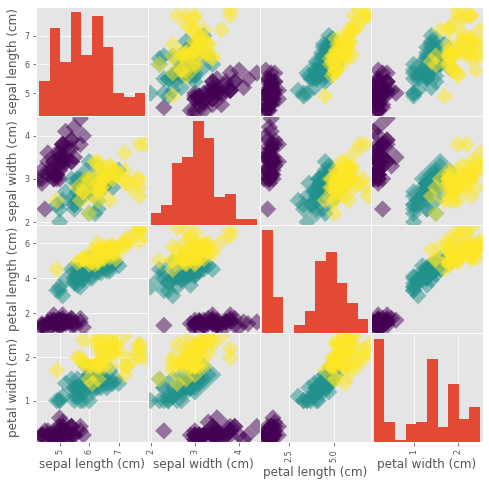

In [15]:
_ = pd.plotting.scatter_matrix(df, c=y, figsize =[8,8],
                              s=150, marker='D') #c-colour

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

#### Requirements
- Data should be numpy array or pandas DataFrame
- Features take out continuous values e.g price of a house; as opposed to categories (male or female)
- No missing values in the data

- The importance of ensuring your data adheres to the format required by the scikit-learn API. The features need to be in an array where each column is a feature and each row a different observation or data point. The target needs to be a single column with the same number of observations as the feature data. 

In [ ]:
# Examle
# y = df['party'].values
# X = df.drop('party', axis=1).values

Create arrays X and y for the features and the target variable. Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.

### Predicing on unlabelled data

In [20]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
                  [5.7, 2.6, 3.8, 1.3],
                  [4.7, 3.2, 1.3, 0.2]])
prediction = knn.predict(X_new)

In [22]:
X_new.shape

(3, 4)

- 3 rows and 4 columns 
- 3 observations and 4 features

In [23]:
print('prediction: {}'.format(prediction))

prediction: [1 1 0]


It predicts one, which corresponds to 'versicolor' for the first two observations and 0, which corresponds to 'setosa' for the third.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=21, stratify=y)

In [39]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [48]:
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [50]:
# To check accuracy of model
knn.score(X_test, y_test)

0.9555555555555556

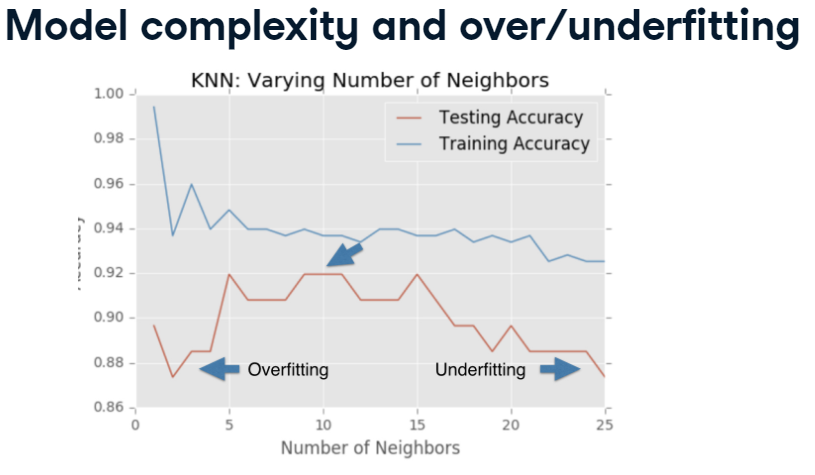

## Example 2

In [51]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

In [52]:
# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [53]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


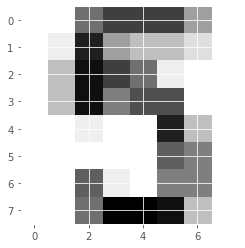

In [54]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [55]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

In [56]:
# Create feature and target arrays
X = digits.data
y = digits.target

In [57]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [58]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


In [59]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [60]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

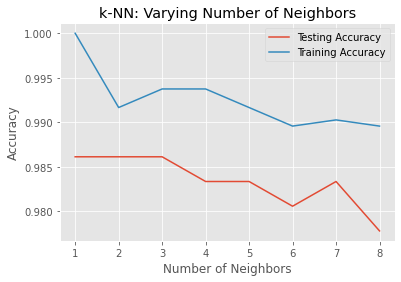

In [61]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data. 